## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from datetime import datetime
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_squared_error

warnings.filterwarnings('ignore')

## Read Data

In [5]:
# df = pd.read_csv("/kaggle/input/fare-amount/final_internship_data.csv")
df = pd.read_csv("final_internship_data.csv")

In [6]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [10]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour


In [11]:
print(len(df["User Name"].unique()))

221675


In [12]:
print(len(df["Driver Name"].unique()))

221700


## null value

In [13]:
print(df.isnull().sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


## handle null value


In [14]:
df.dropna(inplace=True)

In [15]:
print(df.isnull().sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64


## unique value

In [16]:
unique_Weather_conditions = df['Weather'].unique()
print("Unique weather Conditions:", unique_Weather_conditions)


Unique weather Conditions: ['windy' 'cloudy' 'stormy' 'sunny' 'rainy']


In [17]:
unique_traffic_conditions = df['Traffic Condition'].unique()
print("Unique Traffic Conditions:", unique_traffic_conditions)


Unique Traffic Conditions: ['Congested Traffic' 'Flow Traffic' 'Dense Traffic']


In [18]:
unique_car_conditions = df['Car Condition'].unique()
print("Unique car Conditions:", unique_car_conditions)

Unique car Conditions: ['Very Good' 'Excellent' 'Bad' 'Good']


## Visualization Data

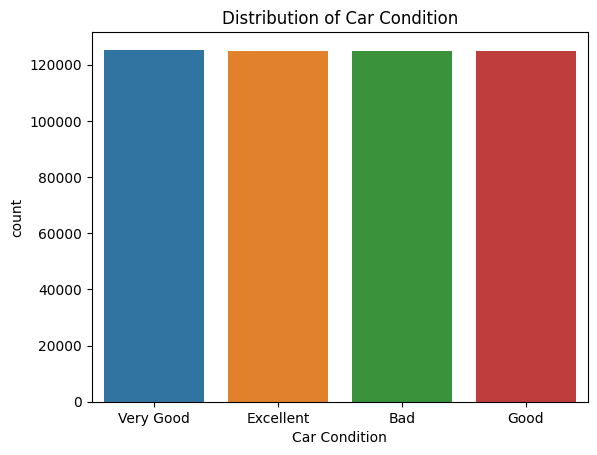

In [12]:
sns.countplot(x="Car Condition", data=df)
plt.title("Distribution of Car Condition")
plt.show()

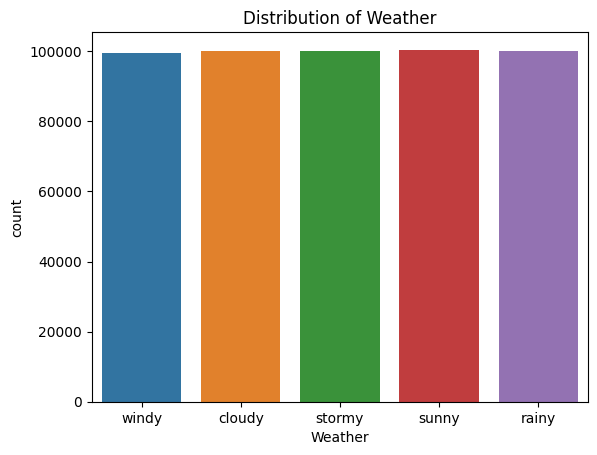

In [13]:
sns.countplot(x="Weather", data=df)
plt.title("Distribution of Weather")
plt.show()

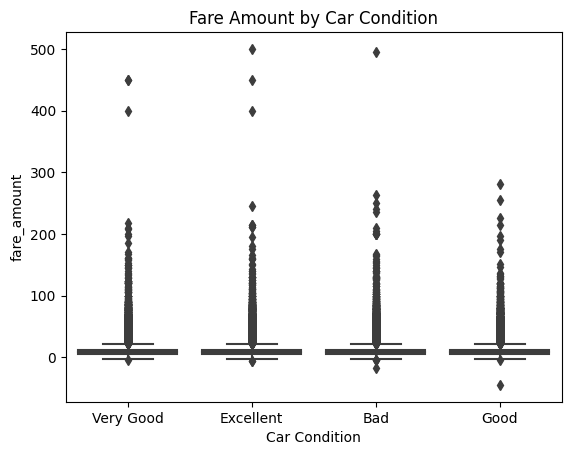

In [14]:
sns.boxplot(x="Car Condition", y="fare_amount", data=df)
plt.title("Fare Amount by Car Condition")
plt.show()

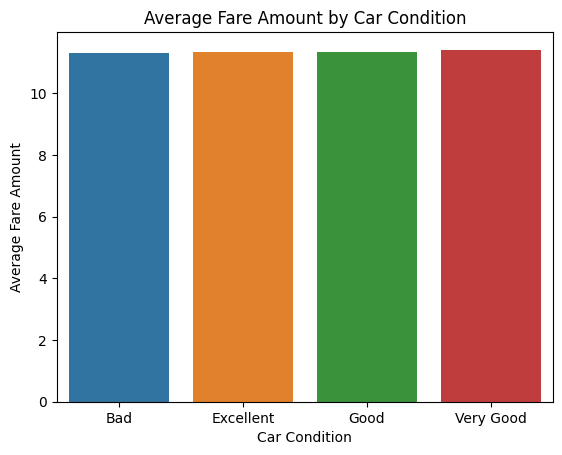

In [15]:
mean_fare = df.groupby("Car Condition")["fare_amount"].mean().reset_index()

sns.barplot(x="Car Condition", y="fare_amount", data=mean_fare)
plt.title("Average Fare Amount by Car Condition")
plt.xlabel("Car Condition")
plt.ylabel("Average Fare Amount")
plt.show()


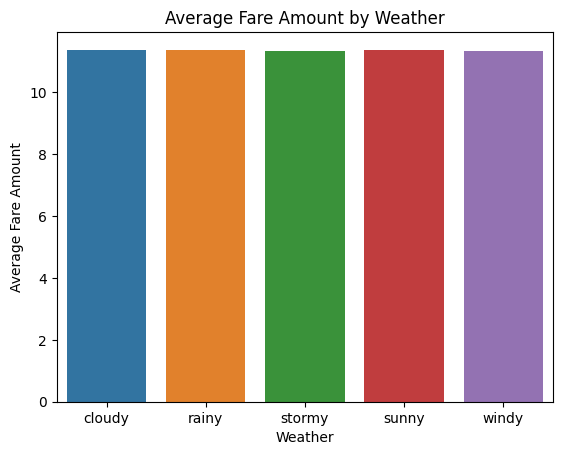

In [16]:
mean_fare = df.groupby("Weather")["fare_amount"].mean().reset_index()

sns.barplot(x="Weather", y="fare_amount", data=mean_fare)
plt.title("Average Fare Amount by Weather")
plt.xlabel("Weather")
plt.ylabel("Average Fare Amount")
plt.show()


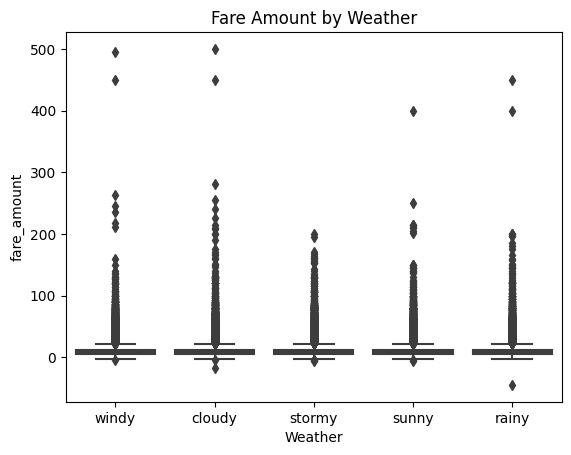

In [17]:
sns.boxplot(x="Weather", y="fare_amount", data=df)
plt.title("Fare Amount by Weather")
plt.show()

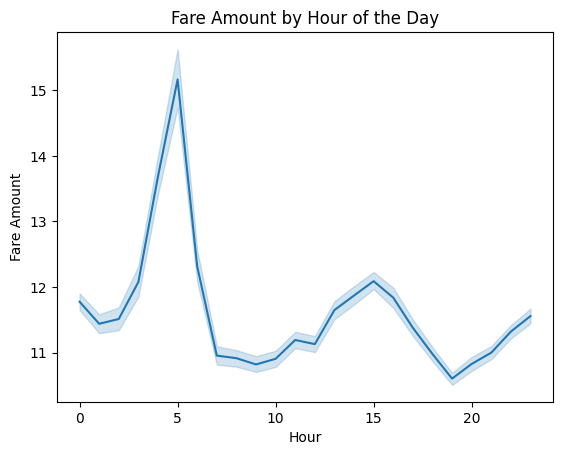

In [18]:
sns.lineplot(x="hour", y="fare_amount", data=df)
plt.title("Fare Amount by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Fare Amount")
plt.show()


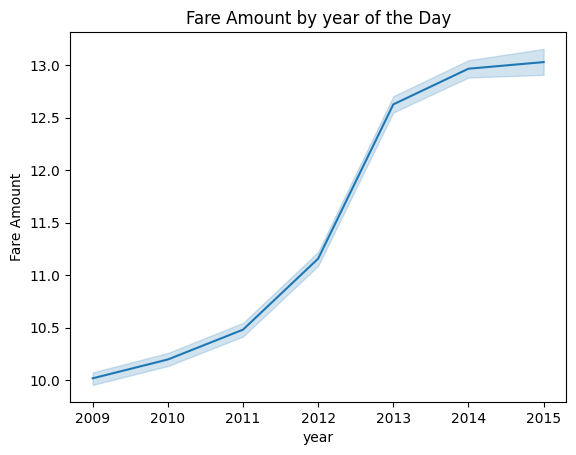

In [19]:
sns.lineplot(x="year", y="fare_amount", data=df)
plt.title("Fare Amount by year of the Day")
plt.xlabel("year")
plt.ylabel("Fare Amount")
plt.show()

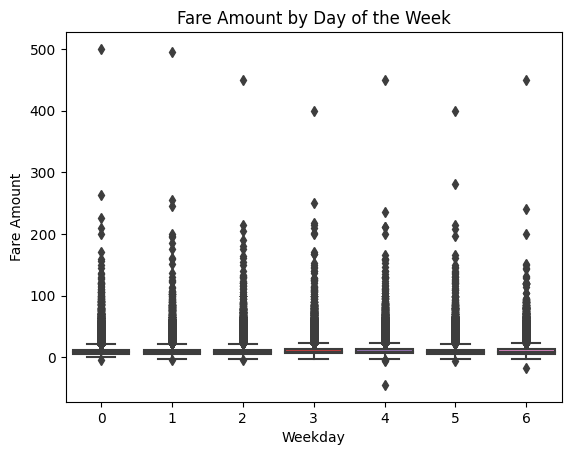

In [20]:
sns.boxplot(x="weekday", y="fare_amount", data=df)
plt.title("Fare Amount by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Fare Amount")
plt.show()


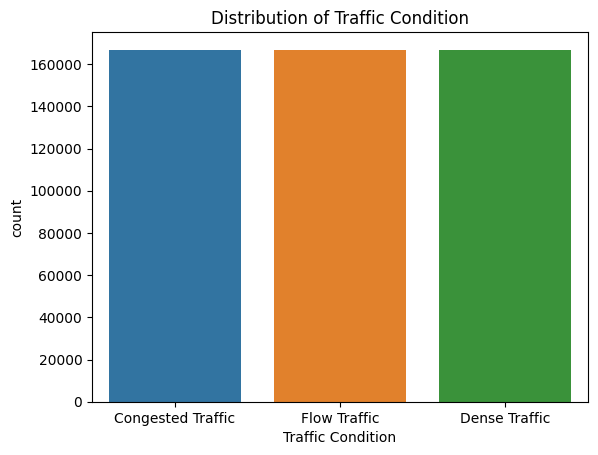

In [21]:
sns.countplot(x="Traffic Condition", data=df)
plt.title("Distribution of Traffic Condition")
plt.show()

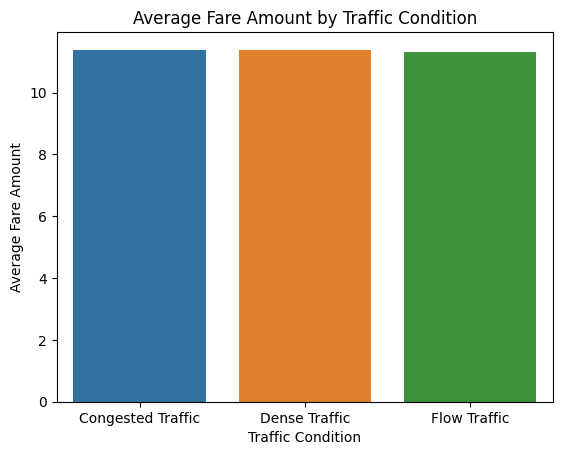

In [22]:
mean_fare = df.groupby("Traffic Condition")["fare_amount"].mean().reset_index()

sns.barplot(x="Traffic Condition", y="fare_amount", data=mean_fare)
plt.title("Average Fare Amount by Traffic Condition")
plt.xlabel("Traffic Condition")
plt.ylabel("Average Fare Amount")
plt.show()

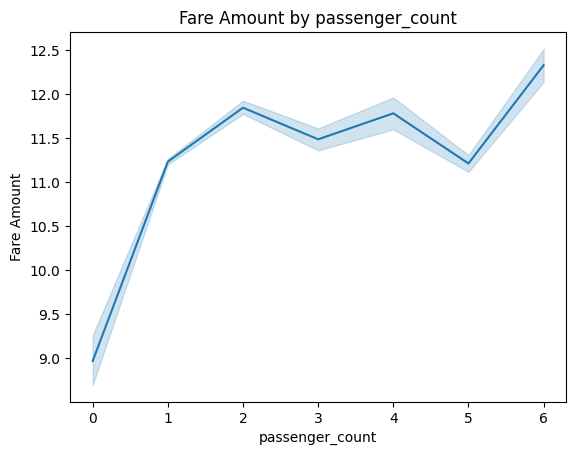

In [23]:
sns.lineplot(x="passenger_count", y="fare_amount", data=df)
plt.title("Fare Amount by passenger_count")
plt.xlabel("passenger_count")
plt.ylabel("Fare Amount")
plt.show()

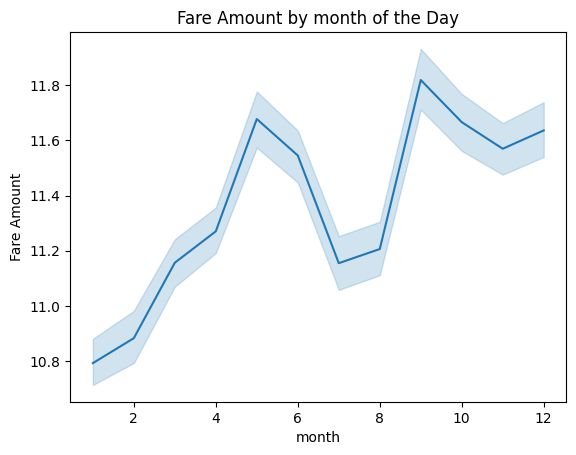

In [24]:
sns.lineplot(x="month", y="fare_amount", data=df)
plt.title("Fare Amount by month of the Day")
plt.xlabel("month")
plt.ylabel("Fare Amount")
plt.show()

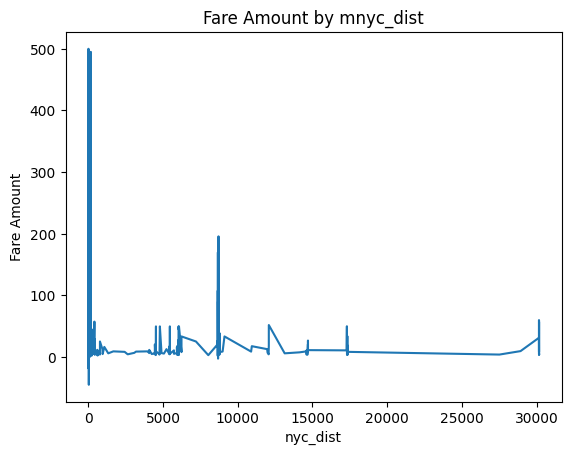

In [25]:
sns.lineplot(x="nyc_dist", y="fare_amount", data=df)
plt.title("Fare Amount by mnyc_dist")
plt.xlabel("nyc_dist")
plt.ylabel("Fare Amount")
plt.show()

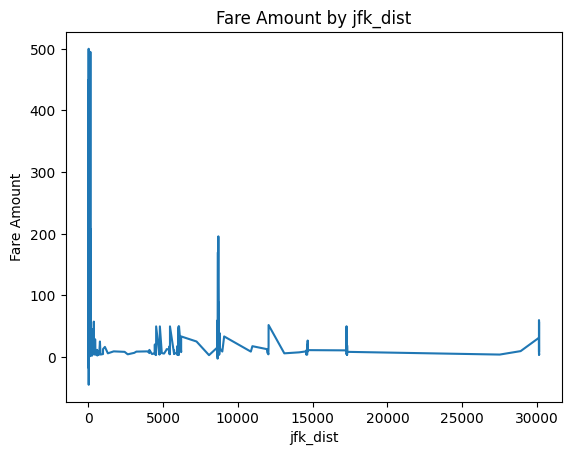

In [26]:
sns.lineplot(x="jfk_dist", y="fare_amount", data=df)
plt.title("Fare Amount by jfk_dist")
plt.xlabel("jfk_dist")
plt.ylabel("Fare Amount")
plt.show()

In [ ]:
sns.lineplot(x="ewr_dist", y="fare_amount", data=df)
plt.title("Fare Amount by ewr_dist")
plt.xlabel("ewr_dist")
plt.ylabel("Fare Amount")
plt.show()

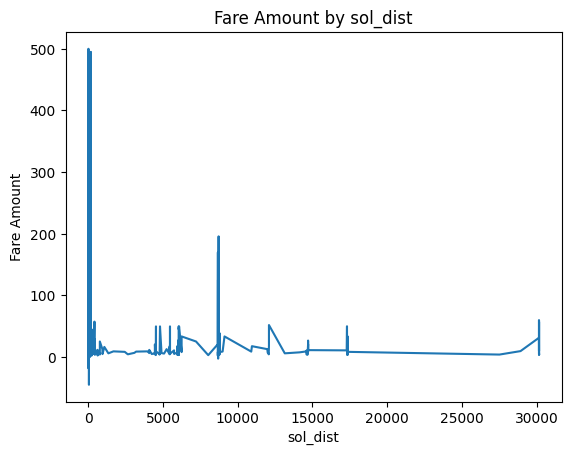

In [29]:
sns.lineplot(x="sol_dist", y="fare_amount", data=df)
plt.title("Fare Amount by sol_dist")
plt.xlabel("sol_dist")
plt.ylabel("Fare Amount")
plt.show()

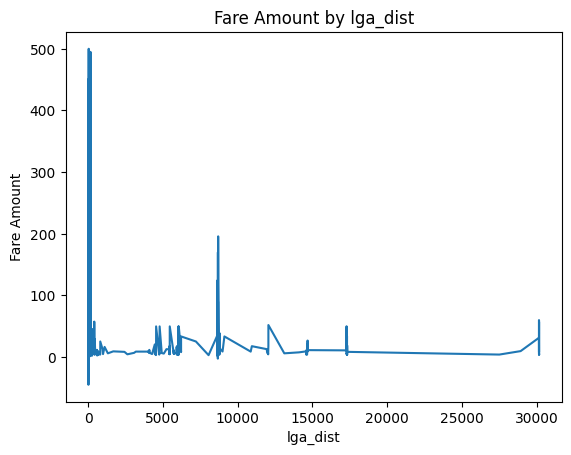

In [26]:
sns.lineplot(x="lga_dist", y="fare_amount", data=df)
plt.title("Fare Amount by lga_dist")
plt.xlabel("lga_dist")
plt.ylabel("Fare Amount")
plt.show()

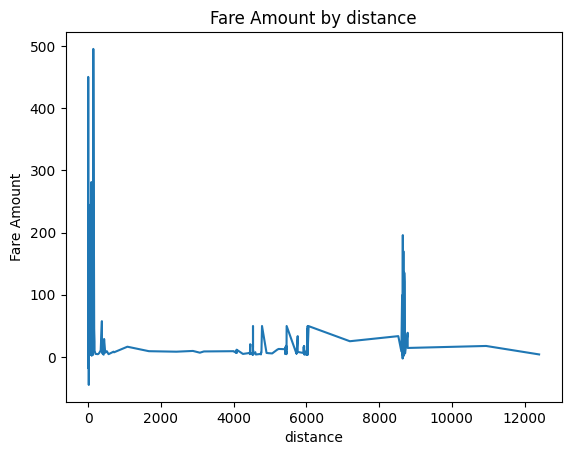

In [27]:
sns.lineplot(x="distance", y="fare_amount", data=df)
plt.title("Fare Amount by distance")
plt.xlabel("distance")
plt.ylabel("Fare Amount")
plt.show()

In [28]:
total_fare = df.groupby("Driver Name")["fare_amount"].sum()
top_10_fares = total_fare.nlargest(10)
print(top_10_fares)

Driver Name
Michael Smith        2868.51
David Smith          2116.96
Michael Johnson      2059.79
Christopher Smith    1980.91
Michael Williams     1896.37
Robert Smith         1828.61
James Smith          1708.78
John Smith           1694.36
Michael Jones        1662.08
Jennifer Smith       1586.90
Name: fare_amount, dtype: float64


In [29]:
less_10_fares = total_fare.nsmallest(10)
print(less_10_fares)

Driver Name
Scott Watkins          -12.4
Kristin Roberts        -12.2
Randy Wilson DDS        -6.5
Theresa Hogan           -5.0
Aimee Duran             -3.0
Miss Susan Greer        -2.5
Charles Kelly DVM        0.0
Kathy Fleming            0.0
Mrs. Stephanie Black     0.0
Shaun Rogers             2.3
Name: fare_amount, dtype: float64


In [30]:
df["fare_amount"].min()

-44.9

In [31]:
df["fare_amount"].max()

500.0

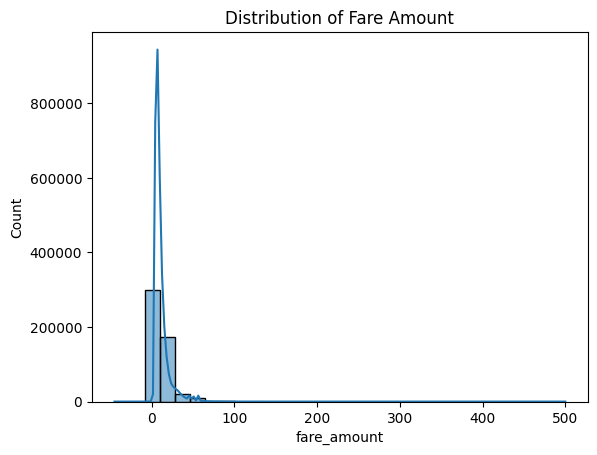

In [32]:
sns.histplot(df["fare_amount"], bins=30, kde=True)
plt.title("Distribution of Fare Amount")
plt.show()

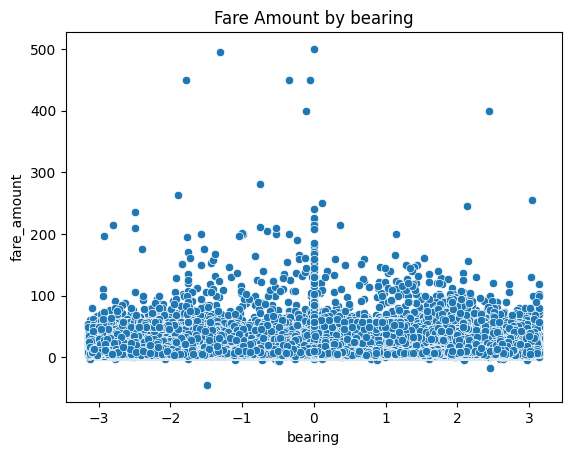

In [33]:
sns.scatterplot(x="bearing", y="fare_amount", data=df)
plt.title("Fare Amount by bearing")
plt.show()

In [34]:
michael_cars = df[df["Driver Name"] == "Michael Smith"]["Car Condition"].unique()
print("Car Conditions for Michael Smith:", michael_cars)

Car Conditions for Michael Smith: ['Good' 'Excellent' 'Bad' 'Very Good']


In [35]:
michael_years = df[df["Driver Name"] == "Michael Smith"]["year"].unique()
print("year for Michael Smith:", michael_years)

year for Michael Smith: [2014 2009 2012 2013 2011 2010 2015]


In [36]:
David_cars = df[df["Driver Name"] == "David Smith"]["Car Condition"].unique()
print("Car Conditions for David Smith:", David_cars)

Car Conditions for David Smith: ['Excellent' 'Good' 'Very Good' 'Bad']


In [37]:
David_years = df[df["Driver Name"] == "David Smith"]["year"].unique()
print("year for David Smith:", David_years)

year for David Smith: [2012 2009 2015 2010 2014 2013 2011]


In [38]:
Scott_cars = df[df["Driver Name"] == "Scott Watkins"]["Car Condition"].unique()
print("Car Conditions for Scott Watkins:", Scott_cars)

Car Conditions for Scott Watkins: ['Bad' 'Excellent']


In [39]:
Scott_years = df[df["Driver Name"] == "Scott Watkins"]["year"].unique()
print("year for Scott Watkins:", Scott_years)

year for Scott Watkins: [2010 2011]


In [40]:
Kristin_cars = df[df["Driver Name"] == "Kristin Roberts"]["Car Condition"].unique()
print("Car Conditions for Scott Watkins:", Kristin_cars)

Car Conditions for Scott Watkins: ['Good' 'Bad' 'Excellent']


In [41]:
Kristin_years = df[df["Driver Name"] == "Kristin Roberts"]["year"].unique()
print("years for Scott Watkins:", Kristin_years)

years for Scott Watkins: [2010 2009 2011]


In [42]:
drivers_per_year = df.groupby("year")["Driver Name"].nunique()
print(drivers_per_year)


year
2009    57681
2010    56836
2011    59384
2012    59537
2013    58295
2014    56418
2015    29303
Name: Driver Name, dtype: int64


In [43]:
total_fare = df.groupby("Driver Name")["fare_amount"].sum()

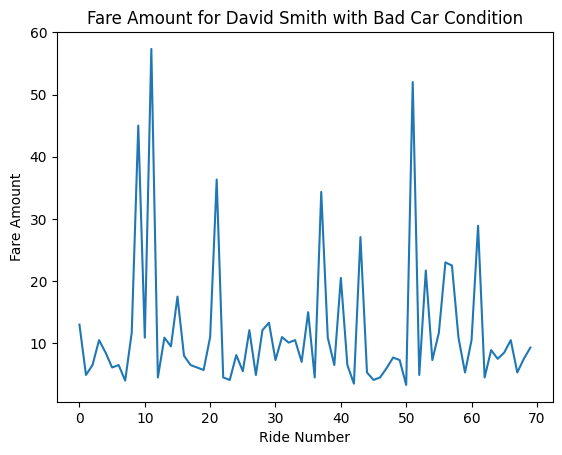

In [44]:
david_bad_car = df[(df["Driver Name"] == "Michael Smith") & (df["Car Condition"] == "Bad")]

david_bad_car = david_bad_car.reset_index()
sns.lineplot(x=david_bad_car.index, y="fare_amount", data=david_bad_car)
plt.title("Fare Amount for David Smith with Bad Car Condition")
plt.xlabel("Ride Number")
plt.ylabel("Fare Amount")
plt.show()

In [45]:
data_2015 = df[df["year"] == 2015]
fare_by_driver = data_2015.groupby("Driver Name")["fare_amount"].sum()
top_5_drivers = fare_by_driver.sort_values(ascending=False).head(5)
print(top_5_drivers)


Driver Name
Melissa Delgado    495.00
Benjamin Mason     461.00
William Smith      246.41
Melvin Weber       245.41
Mary Howard        235.00
Name: fare_amount, dtype: float64


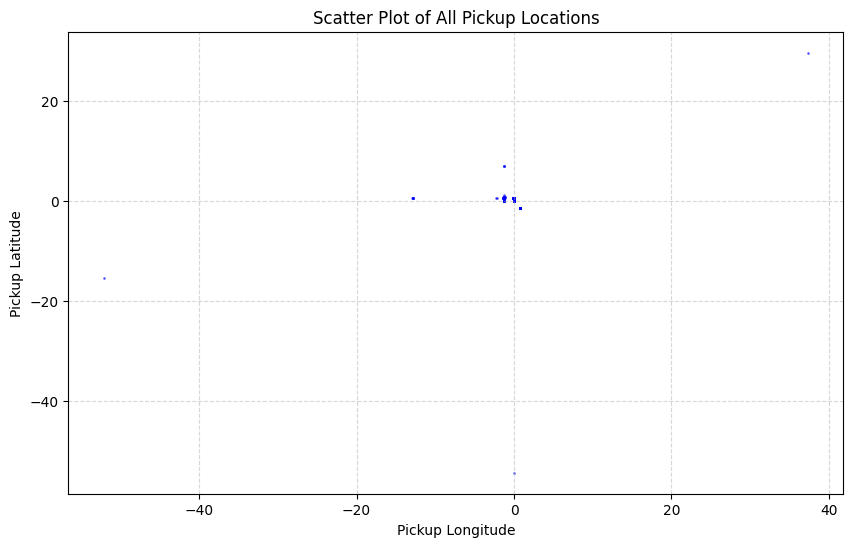

In [46]:

plt.figure(figsize=(10, 6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.5, s=1, color='blue')

plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Scatter Plot of All Pickup Locations")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


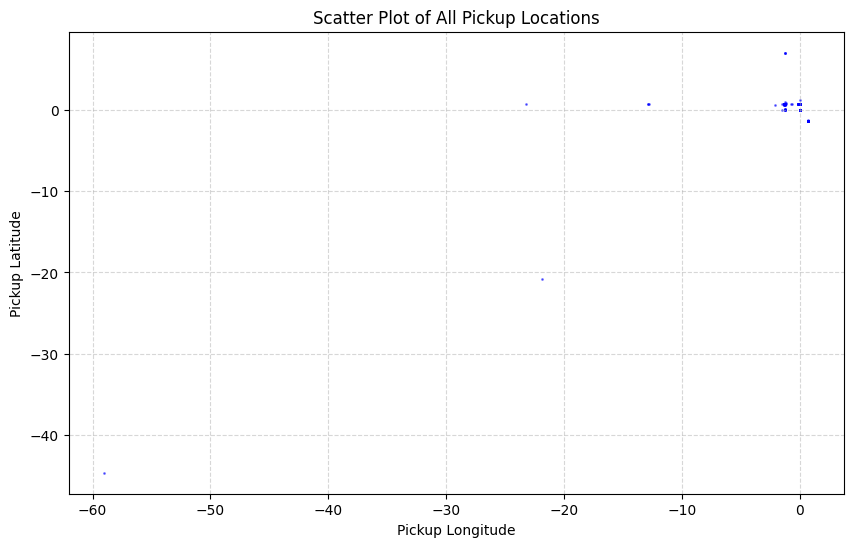

In [47]:

plt.figure(figsize=(10, 6))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], alpha=0.5, s=1, color='blue')

plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Scatter Plot of All Pickup Locations")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


## Data Preprocessing

## drop unimportant feature

In [19]:
df.drop(columns=['User ID', 'User Name', 'Driver Name','key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], inplace=True)


In [20]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')

## handle categorical data

In [21]:
#### manual 
car_mapping = {
    'Bad': 0,
    'Excellent': 1,
    'Good': 2,
    'Very Good': 3
}

weather_mapping = {
    'cloudy': 0,
    'rainy': 1,
    'stormy': 2,
    'sunny': 3,
    'windy': 4,
}

traffic_mapping = {
    'Congested Traffic': 0,
    'Dense Traffic': 1,
    'Flow Traffic': 2,
}



In [22]:
df['Car Condition'] = df['Car Condition'].map(car_mapping)
df['Weather'] = df['Weather'].map(weather_mapping)
df['Traffic Condition'] = df['Traffic Condition'].map(traffic_mapping)


## handle illogical data

In [23]:
count_high_distance = (df['distance'] >= 1000).sum()
print(f"Number of trips with distance >= 1000: {count_high_distance}")

Number of trips with distance >= 1000: 989


In [24]:
average_distance = df[df['distance'] < 1000]['distance'].mean()
df.loc[df['distance'] >= 1000, 'distance'] = average_distance

print("Outliers replaced with average distance:", average_distance)


Outliers replaced with average distance: 3.304724540545414


In [25]:
count_invalid_fare = (df['fare_amount'] <= 0).sum()
print(f"Number of trips with fare_amount <= 0: {count_invalid_fare}")


Number of trips with fare_amount <= 0: 35


In [26]:
df = df[df['fare_amount'] > 0]

In [27]:
count_invalid_fare = (df['fare_amount'] <= 0).sum()
print(f"Number of trips with fare_amount <= 0: {count_invalid_fare}")

Number of trips with fare_amount <= 0: 0


## check outliers

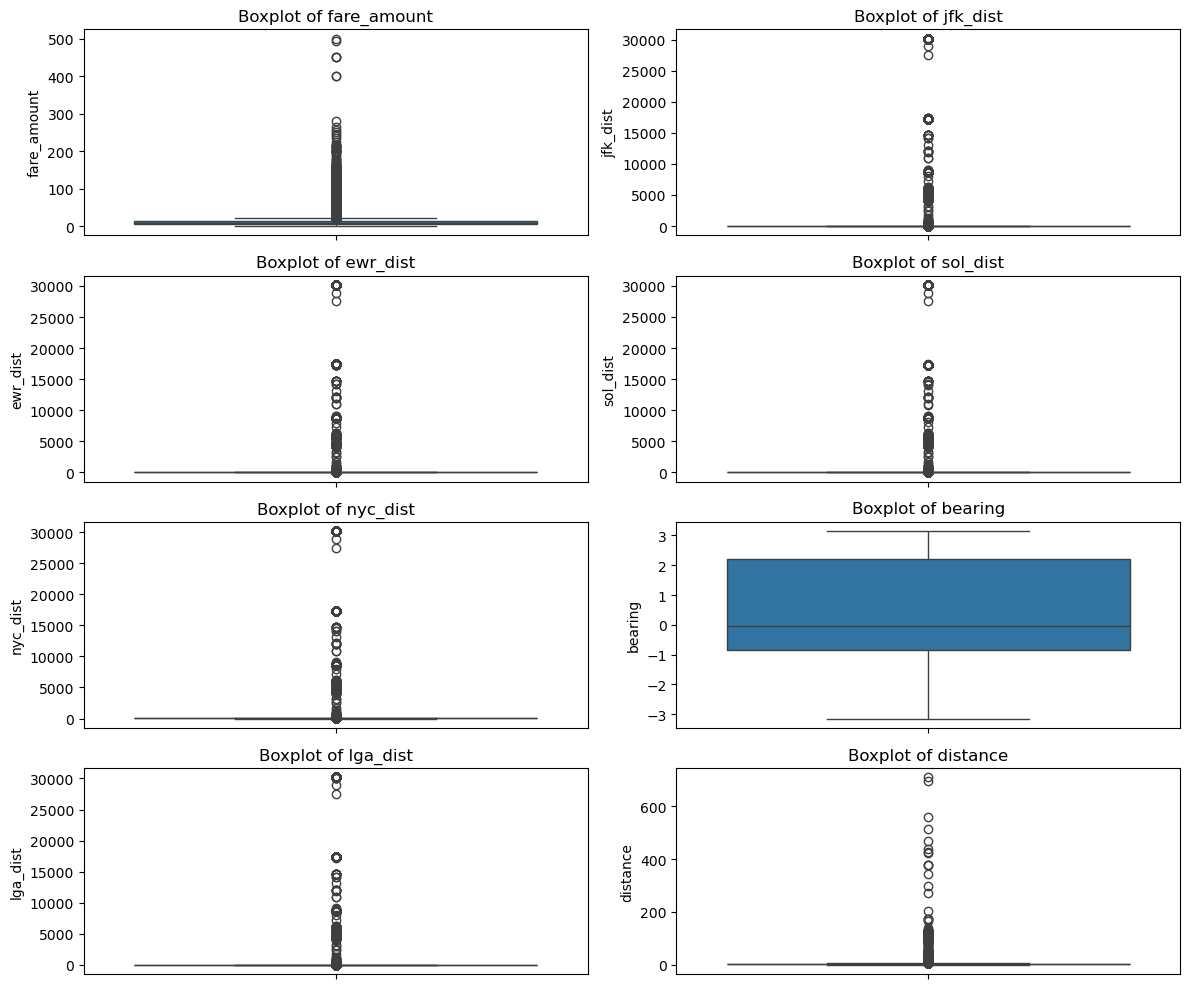

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['fare_amount', 'jfk_dist', 'ewr_dist', 'sol_dist', 'nyc_dist', 'bearing', 'lga_dist', 'distance']

plt.figure(figsize=(12, 10))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## handle outliers

In [29]:
def replace_outliers_with_whisker(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR  

    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    
    return data

In [30]:
outlier_columns = ['fare_amount', 'jfk_dist', 'ewr_dist', 'sol_dist', 'nyc_dist', 'bearing', 'lga_dist', 'distance']

for col in outlier_columns:
    df = replace_outliers_with_whisker(df, col)

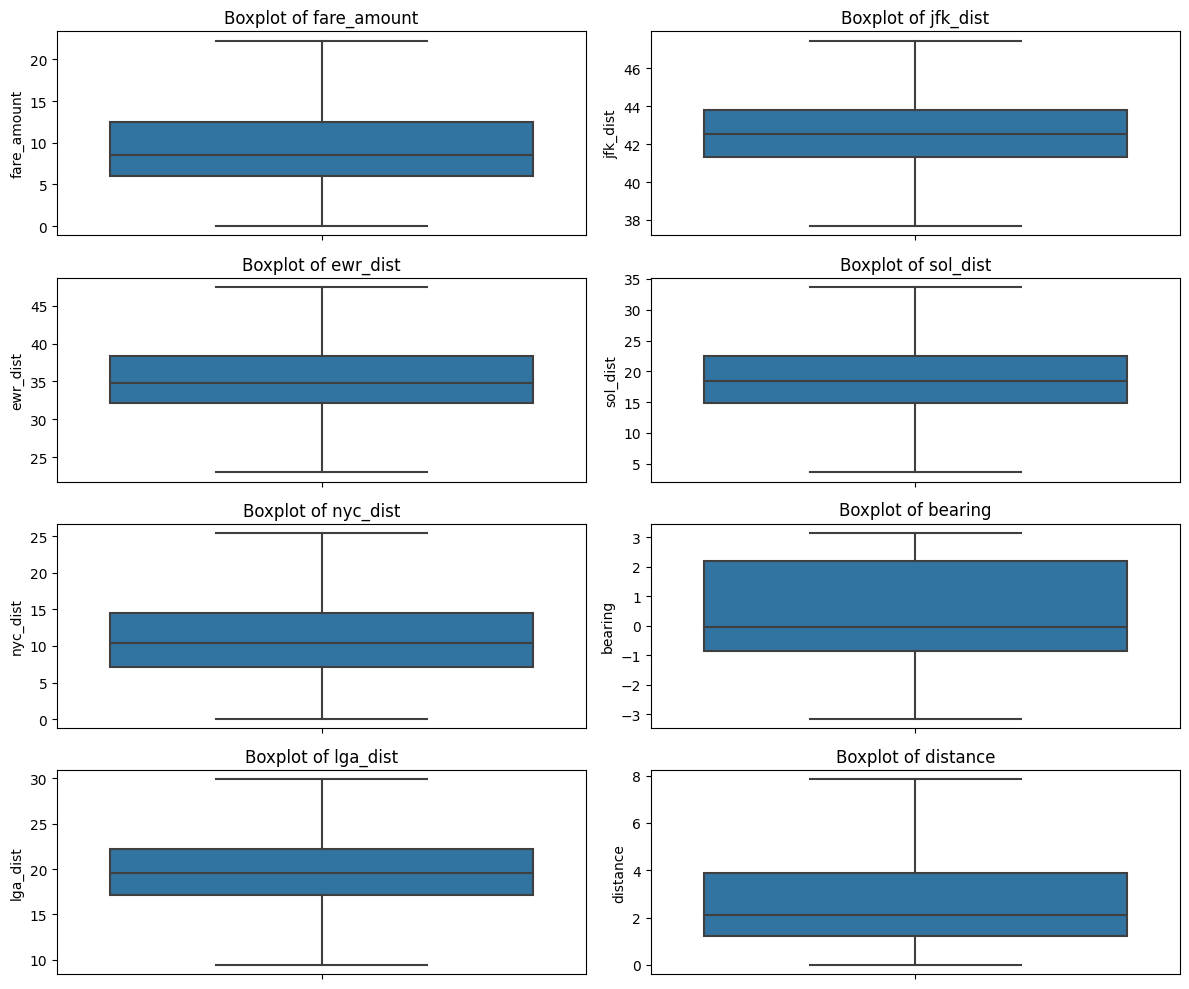

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['fare_amount', 'jfk_dist', 'ewr_dist', 'sol_dist', 'nyc_dist', 'bearing', 'lga_dist', 'distance']

plt.figure(figsize=(12, 10))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## split data

In [31]:
X = df.drop(columns=['fare_amount']) 
y = df['fare_amount']
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Car Condition  Weather  Traffic Condition  passenger_count  hour  day  \
0              3        4                  0                1    17   15   
1              1        0                  2                1    16    5   
2              0        2                  0                2     0   18   
3              3        2                  2                1     4   21   
4              0        2                  0                1     7    9   

   month  weekday  year   jfk_dist   ewr_dist   lga_dist   sol_dist  \
0      6        0  2009  37.675571  47.500032  14.342611  33.712832   
1      1        1  2010  44.667679  31.832358  23.130775  15.125872   
2      8        3  2011  43.597686  33.712082  19.865289  17.722624   
3      4        5  2012  42.642965  32.556289  21.063132  15.738963   
4      3        1  2010  43.329953  39.406828  15.219339  23.732406   

    nyc_dist  distance   bearing  
0  25.399640  1.030764 -2.918897  
1   8.755732  7.844275 -0.375217  
2   9.84734

## make scaler

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## linear regression model

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 2.69


In [35]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 1.81
Root Mean Squared Error (RMSE): 2.69
R² Score: 0.7570


## Random forest model

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest R² Score: 0.8301


In [38]:
joblib.dump(rf_model, './../savedModel/model1.joblib')  
joblib.dump(scaler, './../savedModel/scaler1.joblib')   

['./../savedModel/scaler1.joblib']

In [41]:
print(df.columns)

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')
